# Project 4
#### Objective: To collect salary information on data science jobs in a variety of markets and predict the salary of the job using the location, title and summary of the job

#### Scraping job listings from Indeed.com

In [1]:
url = 'http://www.indeed.com/jobs?q=data+scientist&l=nyc&start=10'

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import requests
import bs4
%matplotlib inline
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split





In [3]:
r = requests.get(url)
soup = BeautifulSoup(r.content, "lxml")

In [4]:
#This function scrapes the location from the given url

def location(soupy):
    loc = soupy.findAll(class_='location')

    locations = []
    for i in loc:
        try:
            locations.append(i.text)
        except:
            locations.append(np.nan)
    return locations

locations = location(soup)

In [5]:
#This function scrapes the company name from the given url

def company(soupy):
    company = soupy.findAll(class_='company')
    companies = []
    for i in company:
        try:
            companies.append(i.text.strip().encode('ascii','ignore'))
        except:
            companies.append(np.nan)
    return companies

companies = company(soup)

In [6]:
def job(soupy):
    title = soupy.findAll(class_='jobtitle')
    titles = []
    for i in title:
        try:
            titles.append(i.text.strip().encode('ascii','ignore'))
        except:
            titles.append(np.nan)
    return titles

def salary(soupy):
    salary = soupy.findAll('nobr' or 'sjcl')
    salaries = []
    for i in salary:
        try:
            salaries.append(i.get_text().strip().encode('ascii','ignore'))
        except:
            salaries.append(np.nan)
    return salaries

def company(soupy):
    company = soupy.findAll(class_='company')
    companies = []
    for i in company:
        try:
            companies.append(i.text.strip().encode('ascii','ignore'))
        except:
            companies.append(np.nan)
    return companies

In [ ]:
def location(soupy):
    loc = soupy.findAll(class_='location')

    locations = []
    for i in loc:
        try:
            locations.append(i.text)
        except:
            locations.append(np.nan)
    return locations

url = 'http://www.indeed.com/jobs?q=data+scientist&l=nyc&start=10'
r = requests.get(url)
soup = BeautifulSoup(r.content, "lxml")

In [7]:
#This function scrapes the salary from the given url

def salary(soupy):
    salary = soupy.findAll('nobr' or 'sjcl')
    salaries = []
    for i in salary:
        try:
            salaries.append(i.get_text().strip().encode('ascii','ignore'))
        except:
            salaries.append(np.nan)
    return salaries

salaries = salary(soup)

In [54]:
#Adds the pulled data into a dataframe

df = pd.DataFrame([titles, companies, locations, salaries]).T
df.columns = ['title', 'company', 'locations','salary']
df.head()

,title,company,locations,salary
0,Junior Data Scientist,UncommonGoods,"New York, NY",relevance -\n date
1,Data Scientist Predictive Analytics,Gallup,"New York, NY",$800 a day
2,Data Scientist & Analytics Developer,Lancer Insurance Company,"Long Beach, NY",About
3,Data Scientist,Brilliant Leap,"New York, NY",None
4,"Research Associate, R&D","Stemline Therapeutics, Inc.","New York, NY 10022 (Midtown area)",None


In [55]:
#cycles through each of the cities listed and the results pages pulling the job data and appending to results

url_template = 'http://www.indeed.com/jobs?q=data+scientist&l={}&start={}'

max_results_per_city = 500

results = [[],[],[],[]]

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Miami', 'Atlanta','Los+Angeles',\
                 'Houston','Seattle','Phoenix','San+Diego']):
    for start in range(0, max_results_per_city, 10):
        response = requests.get(url_template.format(city,start))
        page = response.text
        soup = BeautifulSoup(page,'lxml')
        results[0].extend(location(soup))
        results[1].extend(company(soup))
        results[2].extend(job(soup))
        results[3].extend(salary(soup))
        pass

#reduce(lambda x, y: x.extend(y), results)


In [217]:
#creates dataframe df with all of the results for each city

df = pd.DataFrame([results[2], results[1], results[0], results[3]]).T
df.columns = ['title', 'company', 'location','salary']
df.head()

,title,company,location,salary
0,Computational Scientist,MD ANDERSON CANCER CENTER,"Houston, TX",relevance -\n date
1,Machine Learning Expert,Arundo Analytics,"Houston, TX",About
2,Quantitative Marketing Analyst,Numeric Jobs,"Houston, TX",relevance -\n date
3,Data Scientist,Panton,"Houston, TX","$160,000 a year"
4,Senior Data Scientist,Shell,"Houston, TX",About


In [218]:
#cleans salary data by turning alpha strings to nans and dropping any salaries not in annual terms

def salarydrop(value):
    c=0
    #value = value.encode('utf8')
    value = value.split()
    if 'relevance' in value: 
        return 'nan'
    for i in value:
        if i.isalpha() == True:
            c+=1
            if c == len(value):
                return 'nan'
            
    todrop = ['hourly','hour', 'weekly','week','monthly','month','day','daily']
    for i in todrop:
        if i in value:
            return 'drop'
    return " ".join(value)
        
    
df['salary'] = df['salary'].astype(str)
df['salary'] = df['salary'].to_frame().applymap(salarydrop)
df = df[df['salary']!='drop']
df.salary.unique()

array(['nan', '$160,000 a year', '$49,506 a year', '$70,000 a year',
       '$93,431 a year', '$51,600 - $77,400 a year',
       '$60,000 - $75,000 a year', '$54,590 a year',
       '$28,909 - $36,000 a year', '$67,632 a year',
       '$60,000 - $95,000 a year', '$85,000 - $115,000 a year',
       '$90,000 - $100,000 a year', '$48,000 a year',
       '$50,000 - $55,000 a year', '$105,000 a year', '$71,000 a year',
       '$115,000 - $150,000 a year', '$80,000 - $110,000 a year',
       '$110,000 - $200,000 a year', '$125,000 a year', '$85,000 a year',
       '$95,000 a year', '$138,300 a year', '$140,000 a year',
       '$145,000 a year', '$150,000 a year', '$110,000 - $160,000 a year',
       '$80,000 - $100,000 a year', '$185,000 a year',
       '$50,000 - $60,000 a year', '$100,000 - $120,000 a year',
       '$100,000 - $140,000 a year', '$150,000 - $200,000 a year',
       '$120,000 a year', '$110,000 - $150,000 a year',
       '$70,000 - $110,000 a year', '$165,000 a year',
      

In [219]:
df.head()

,title,company,location,salary
0,Computational Scientist,MD ANDERSON CANCER CENTER,"Houston, TX",nan
1,Machine Learning Expert,Arundo Analytics,"Houston, TX",nan
2,Quantitative Marketing Analyst,Numeric Jobs,"Houston, TX",nan
3,Data Scientist,Panton,"Houston, TX","$160,000 a year"
4,Senior Data Scientist,Shell,"Houston, TX",nan


In [220]:
#removes the '$' from salary and returns a float. If salary is listed as range, the mean will be returned

def salaryfix(value):
    c=0
    value = str(value)
    if value.isalpha == True:
        return value
    if "a year" in value:
        value = value[:-6]
    if "-" in value:
        value = value.split('-')
        for nums in value:
            value = salaryfix(nums)
            c+=1
            if c==1:
                thesum=0
            thesum += value
        return thesum/2
    value = str(value)
    value = value.replace('$', '')
    value = value.replace(',', '')
    value = float(value)
    return value

df['salary'] = df['salary'].to_frame().applymap(salaryfix)

In [221]:
#this function removes any characters after the ',' in the city column

def cityfix(value):
    value = str(value)
    value = value.split(',')
    return value[0]

df['location'] = df['location'].to_frame().applymap(cityfix)

In [222]:
#removes any duplicate entries

df = df.drop_duplicates()
df.head()

,title,company,location,salary
0,Computational Scientist,MD ANDERSON CANCER CENTER,Houston,NaN
1,Machine Learning Expert,Arundo Analytics,Houston,NaN
2,Quantitative Marketing Analyst,Numeric Jobs,Houston,NaN
3,Data Scientist,Panton,Houston,160000.0
4,Senior Data Scientist,Shell,Houston,NaN


In [223]:
df.to_csv('jobresults.csv')

## Predicting salaries using Logistic Regression

In [224]:
df2 = pd.read_csv('jobresults.csv')

In [225]:
#this function returns a true value if the salary is higher than the median


median = df.salary.median()

def salarybool(value):
    if value >= median:
        return True
    else: return False
    
df['salaryhigh'] = df.salary.to_frame().applymap(salarybool)
df.head(10)

,title,company,location,salary,salaryhigh
0,Computational Scientist,MD ANDERSON CANCER CENTER,Houston,NaN,False
1,Machine Learning Expert,Arundo Analytics,Houston,NaN,False
2,Quantitative Marketing Analyst,Numeric Jobs,Houston,NaN,False
3,Data Scientist,Panton,Houston,160000.0,True
4,Senior Data Scientist,Shell,Houston,NaN,False
5,Research Scientist,"GeoControl Systems, Inc.",Houston,NaN,False
6,Marketing Data Scientist,Alert Logic,Houston,49506.0,False
7,Data Scientist - Houston,"Amazon Web Services, Inc.",Houston,NaN,False
8,Data Scientist,IHS,Houston,NaN,False
9,Research Statistical Analyst,MD ANDERSON CANCER CENTER,Houston,70000.0,False


In [226]:
#location, salary, and the boolean salary variable have been pulled out and dummy variables created for each location.


tempdf = df[df['salary']>0]
locationdf = tempdf[['location','salary','salaryhigh']]


locationdf['key'] = range(len(locationdf['location']))
locationdf = pd.concat([locationdf.drop('key',axis=1),pd.get_dummies(locationdf['location'])], axis = 1)
locationdf['constant'] = 1
del locationdf['United States']
locationdf.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,location,salary,salaryhigh,Gilbert,Glendale,Houston,Mesa,Phoenix,Scottsdale,Spring,Tempe,constant
3,Houston,160000.0,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
6,Houston,49506.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
9,Houston,70000.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
10,Houston,93431.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
19,Houston,64500.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [227]:
#sets target and data variables and prints shape

X = locationdf[list(locationdf.columns[3:])]
y = locationdf.salaryhigh
print X.shape
print y.shape


(217, 9)
(217,)


In [211]:
#fits statsmodel logistic regression model based on test and target data

model = sm.Logit(y,X)
model_fit = model.fit(method = 'bfgs')
model_fit.summary()

         Current function value: 0.682259
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             salaryhigh   No. Observations:                  217
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            8
Date:                Fri, 08 Jul 2016   Pseudo R-squ.:                 0.01497
Time:                        08:23:14   Log-Likelihood:                -148.05
converged:                      False   LL-Null:                       -150.30
                                        LLR p-value:                    0.8095
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Gilbert        2.4781      5.231      0.474      0.636        -7.775    12.732
Glendale       2.4781      5.231      0.474      0.636        -7.775    12.732
Houston       -0.6396      0.968     -0.661      0.509        -2.536     1.257
Mesa          -0.4250      1.718     -0.247      0.805        -3.792     2.942
Phoenix       -0.6091      0.999     -0.610      0.542        -2.568     1.349
Scottsdale    -1.0956      1.073     -1.021      0.307        -3.199     1.007
Spring        -2.8429      3.377     -0.842      0.400        -9.462     3.776
Tempe         -0.5337      1.164     -0.458      0.647        -2.816     1.748
constant       0.7173      0.953      0.753      0.451        -1.150     2.584
==============================================================================
"""

The magnitude of the coefficients represent the salaries in that city relative to the median salary.

In [262]:
#this function adds a field for title level and returns level based on key words in title

def titlelevel(value):
    value = str(value)
    if 'Manager' in value:
        return 'manager'
    elif 'Director' in value:
        return 'director'
    elif 'VP' in value:
        return 'vp'
    elif 'Chief' in value:
        return 'chief'
    elif 'Analyst' in value:
        return 'analyst'
    elif 'Scientist' in value:
        return 'scientist'
    elif 'Engineer' in value:
        return 'engineer'
    else: return 'other'

locationdf['titlelevel'] = df.title.to_frame().applymap(titlelevel)

In [263]:
locationdf.head()

,location,salary,salaryhigh,Gilbert,Glendale,Houston,Mesa,Phoenix,Scottsdale,Spring,...,manager,other,analytics,corp,group,other,software,tech,university,titlelevel
3,Houston,160000.0,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,scientist
6,Houston,49506.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,scientist
9,Houston,70000.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,analyst
10,Houston,93431.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,scientist
19,Houston,64500.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,manager


In [264]:
# import patsy
# f = 'y ~ x'
# y, X = patsy.dmatrices(f, df, return_type='dataframe')
# sm.Logit(y, X).fit().summary()

In [265]:
#titlelevel, salary, and the boolean salary variable have been pulled out and dummy variables created for each title level.

locationdf['key'] = range(len(locationdf['titlelevel']))
locationdf = pd.concat([locationdf.drop('key',axis=1),pd.get_dummies(locationdf['titlelevel'])], axis = 1)
locationdf['constant'] = 1
del locationdf['scientist']
del locationdf['titlelevel']
locationdf.head()

,location,salary,salaryhigh,Gilbert,Glendale,Houston,Mesa,Phoenix,Scottsdale,Spring,...,group,other,software,tech,university,analyst,director,engineer,manager,other
3,Houston,160000.0,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Houston,49506.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Houston,70000.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,Houston,93431.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Houston,64500.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [266]:
#fits the features (X) and the salaryhigh (T/F) to the logistic regression model

model = LogisticRegression()
X = locationdf[list(locationdf.columns[3:])]
y = locationdf.salaryhigh

model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [267]:
#predicts salaryhigh T/F as well as prints the confusion matrix

lr = LogisticRegression(solver='liblinear')
ypredict = model.predict(X)
cm = confusion_matrix(y,ypredict)
dfcm = pd.DataFrame(cm, columns=['Predicted High','Predicted Low'], index=['Actual High','Actual Low'])
dfcm

,Predicted High,Predicted Low
Actual High,49,56
Actual Low,33,79


In [268]:
cross_val_score(lr, X, y, cv=3).mean()

0.47932521562658548

In [269]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

acc = accuracy_score(y, ypredict)
pres = precision_score(y, ypredict)
reca = recall_score(y, ypredict)
auc = auc(y, ypredict)
print "Accuracy Score: %f"%(acc)
print "Precision Score: %f"%(pres)
print "Recall Score: %f"%(reca)
print "AUC: %f"%(auc)

Accuracy Score: 0.589862
Precision Score: 0.585185
Recall Score: 0.705357
AUC: 33.500000


The Precision (58%) represents the actual positives (high salaries) over the all the predicted positives. 
The Recall (79%) represents the predicted positives over all actual positives regardless of prediction.
The AUC is the area under the ROC curve and increases with model accuracy.

A high precision model is ideal if you're choosing listings to apply to and don't want to waste your time on interviews if salary is actually lower than predicted. A high recall model is ideal if you have a small number of listings and do not want to miss any high salary positions due to a false negative.


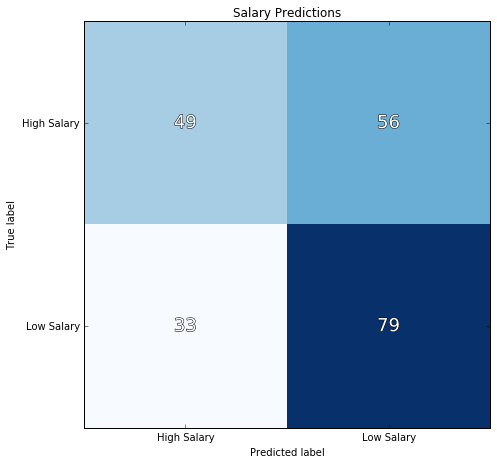

In [270]:
plot_confusion_matrix(cm)

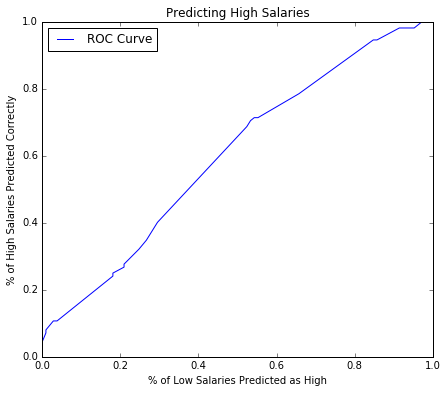

In [271]:
x

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [273]:
lr1 = LogisticRegression(penalty='l1')
lr2 = LogisticRegression(penalty='l2')

lr1_model = lr1.fit(X, y)
lr2_model = lr2.fit(X, y)
y1_pred = lr1.predict(X)
y2_pred = lr2.predict(X)

In [274]:
cm1 = confusion_matrix(y, y1_pred, labels=lr1.classes_)
cm1 = pd.DataFrame(cm1, columns=['Predicted High','Predicted Low'], index=['Actual High','Actual Low'])

cm2 = confusion_matrix(y, y2_pred, labels=lr2.classes_)
cm2 = pd.DataFrame(cm2, columns=['Predicted High','Predicted Low'], index=['Actual High','Actual Low'])

In [275]:
cm1

,Predicted High,Predicted Low
Actual High,105,0
Actual Low,0,112


In [276]:
cm2

,Predicted High,Predicted Low
Actual High,105,0
Actual Low,0,112


#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

In [277]:
df.company.unique

<bound method Series.unique of 0                 MD ANDERSON CANCER CENTER
1                          Arundo Analytics
2                              Numeric Jobs
3                                    Panton
4                                     Shell
5                  GeoControl Systems, Inc.
6                               Alert Logic
7                 Amazon Web Services, Inc.
8                                       IHS
9                 MD ANDERSON CANCER CENTER
10                             Schlumberger
11                                       GE
12                                   Panton
13                      The Hanover Company
14                                   Gallup
18                       Quantlab Financial
19                         Oscar Technology
20                                       BP
21                        Houston Methodist
22                                     CBRE
23                        Houston Methodist
25                   Sapient Global Markets
2

In [278]:
#this function adds a field for title level and returns level based on key words in title

def comkeyword(value):
    value = str(value)
    #value = value.encode('ascii','ignore')
    if 'Corp' in value:
        return 'corp'
    elif 'Analytics' in value:
        return 'analytics'
    elif 'University' in value:
        return 'university'
    elif 'Group' in value or 'group' in value:
        return 'group'
    elif 'Technology' in value or 'Technologies' in value:
        return 'tech'
    elif 'Software' in value:
        return 'software'
    elif 'Engineer' in value:
        return 'engineer'
    else: return 'other'

locationdf['keyword'] = df['company'].to_frame().applymap(comkeyword)

In [279]:
locationdf.head()

,location,salary,salaryhigh,Gilbert,Glendale,Houston,Mesa,Phoenix,Scottsdale,Spring,...,other,software,tech,university,analyst,director,engineer,manager,other,keyword
3,Houston,160000.0,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other
6,Houston,49506.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other
9,Houston,70000.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,other
10,Houston,93431.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other
19,Houston,64500.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,tech


In [280]:
locationdf['key'] = range(len(locationdf['keyword']))
locationdf = pd.concat([locationdf.drop('key',axis=1),pd.get_dummies(locationdf['keyword'])], axis = 1)
locationdf['constant'] = 1
del locationdf['keyword']
#del locationdf['titlelevel']
locationdf.head()

,location,salary,salaryhigh,Gilbert,Glendale,Houston,Mesa,Phoenix,Scottsdale,Spring,...,engineer,manager,other,analytics,corp,group,other,software,tech,university
3,Houston,160000.0,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Houston,49506.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,Houston,70000.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10,Houston,93431.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,Houston,64500.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [281]:
model = LogisticRegression()
X = locationdf[list(locationdf.columns[3:])]
y = locationdf.salaryhigh
model.fit(X, y)
lr = LogisticRegression(solver='liblinear')
ypredict = model.predict(X)
cm = confusion_matrix(y,ypredict)
dfcm = pd.DataFrame(cm, columns=['Predicted High','Predicted Low'], index=['Actual High','Actual Low'])
dfcm

,Predicted High,Predicted Low
Actual High,49,56
Actual Low,33,79


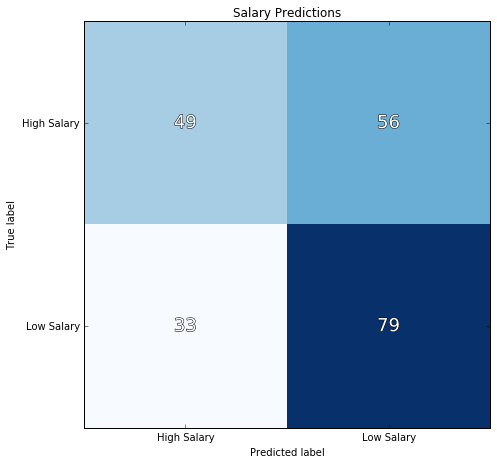

In [293]:
plot_confusion_matrix(cm)

In [282]:
cross_val_score(lr, X, y, cv=3).mean()

0.51128868594622023

In [298]:
acc = accuracy_score(y, ypredict)
pres = precision_score(y, ypredict)
reca = recall_score(y, ypredict)

Accuracy Score: 0.589862
Precision Score: 0.585185
Recall Score: 0.705357


#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [301]:
newdf = locationdf.tail(100)
yknown = newdf['salary']
Xtest = newdf[list(newdf.columns[3:])]


In [302]:
print Xtest.shape
print yknown.shape

(100, 65)
(100,)


In [303]:
ypredict = model.predict(Xtest)

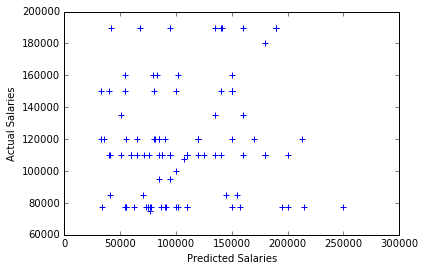

MSE: 3273611774.12


In [306]:
from sklearn.metrics import mean_squared_error
plt.scatter(ypredict, ypredict, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted Salaries")
plt.ylabel("Actual Salaries")
plt.show()
print "MSE:", mean_squared_error(yknown, ypredict)

In [305]:
ypredict

array([ 77500,  77500,  77500,  77500,  77500,  77500,  77500,  77500,
       150000,  77500,  77500, 150000,  77500,  77500,  77500,  77500,
        75000,  77500,  77500,  77500,  77500,  77500,  77500, 180000,
        77500, 110000,  77436, 120000, 120000, 120000, 150000, 110000,
       110000, 110000, 120000,  95000, 110000, 150000, 110000, 110000,
        77500, 150000, 150000, 110000, 110000, 100000, 107500, 110000,
        95000, 120000, 190000,  85000, 110000, 135000, 110000, 110000,
       110000, 190000,  85000, 150000, 110000,  85000, 160000, 190000,
       150000, 120000,  85000, 135000, 190000, 110000, 110000, 160000,
       120000, 110000, 110000, 160000, 120000, 150000, 120000, 120000,
       120000, 190000, 110000, 135000, 160000, 190000, 120000, 110000,
       150000, 190000, 110000, 190000, 110000, 120000, 110000, 160000,
       120000, 190000, 120000, 110000])

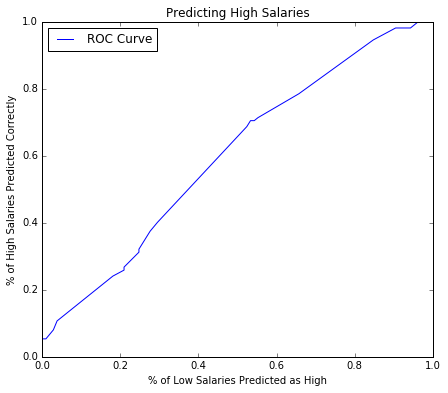

In [295]:
Xtrain = locationdf[list(locationdf.columns[3:])]
y = locationdf['salaryhigh']
model.fit(Xtrain, y)
proba = model.predict_proba(X).T[1]
roc = roc_curve(y,proba)
getROCcurve(roc, title='Predicting High Salaries', ylabel='% of High Salaries Predicted Correctly',\
            xlabel='% of Low Salaries Predicted as High')

In [292]:
cross_val_score(lr, Xtrin, y, cv=3).mean()

0.51128868594622023